# Installing 

In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')



#General trend


In [473]:
from google.colab import files
uploaded = files.upload()

In [476]:

epex = pd.read_csv('combined_prices.csv', index_col="Date")
# log_hold= epex.apx_da_hourly.apply(np.log).diff(1)
epex
all = epex.drop('Unnamed: 0',axis =1)

In [477]:
all

Period  EpexHourly  SpotPrice  SystemPrice  ImbalanceVolume
Date                                                                   
08/04/2019       1       33.41      40.45        52.25         195.4258
08/04/2019       2       33.41      43.69        51.90          62.2486
08/04/2019       3       41.03      46.13        32.76         -40.7968
08/04/2019       4       41.03      43.96        50.85          22.6933
08/04/2019       5       39.00      44.36        51.40         186.5092
...            ...         ...        ...          ...              ...
15/12/2021      44      258.30     231.98       295.00          47.1667
15/12/2021      45      231.80     238.32       176.55        -239.7501
15/12/2021      46      231.80     213.15       176.55        -297.1255
15/12/2021      47      231.00     218.80       350.00          65.4437
15/12/2021      48      231.00     157.07       350.00         336.3496

[47184 rows x 5 columns]

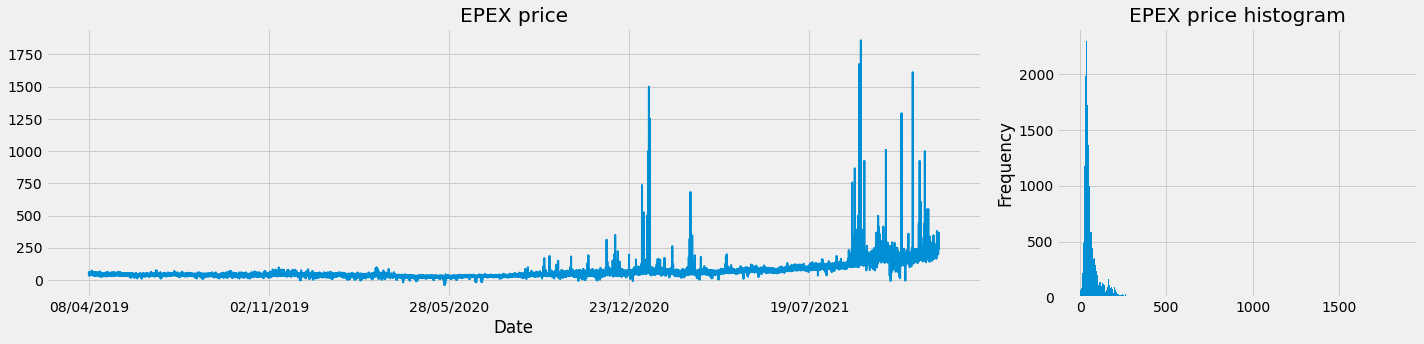

In [541]:

subplots_ratio = dict(width_ratios=[13,5], height_ratios=[1]) 
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(20,5))
all['EpexHourly'].plot(title='EPEX price', ax=ax[0], grid=True, linewidth=2) 
all['EpexHourly'].plot.hist(title='EPEX price histogram', ax=ax[1], grid=True, bins=1000)
# plt.tight_layout()
plt.savefig('undiff_epex.png')

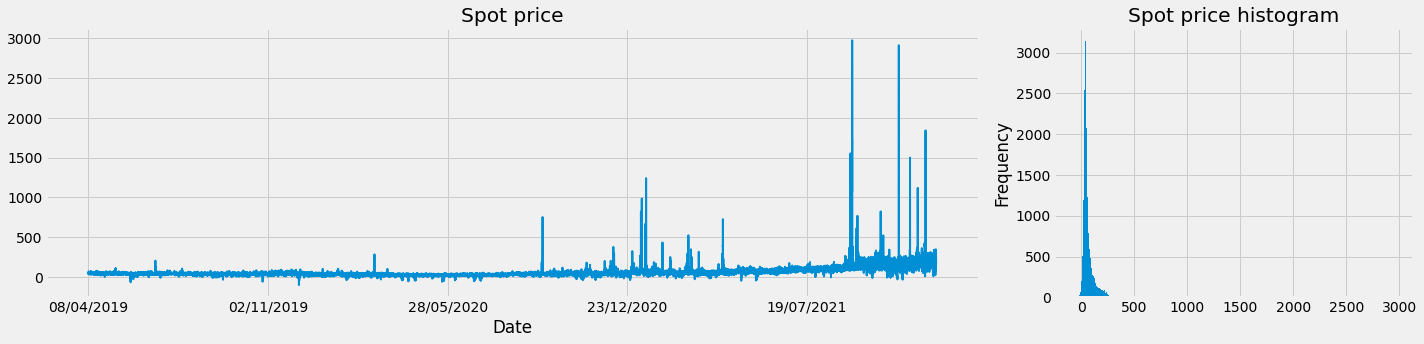

In [479]:

subplots_ratio = dict(width_ratios=[13,5], height_ratios=[1]) 
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(20,5))
all['SpotPrice'].plot(title='Spot price', ax=ax[0], grid=True, linewidth=2) 
all['SpotPrice'].plot.hist(title='Spot price histogram', ax=ax[1], grid=True, bins=1000)
# plt.tight_layout()
ylim(2000,0)

plt.savefig('undiff_epex.png')

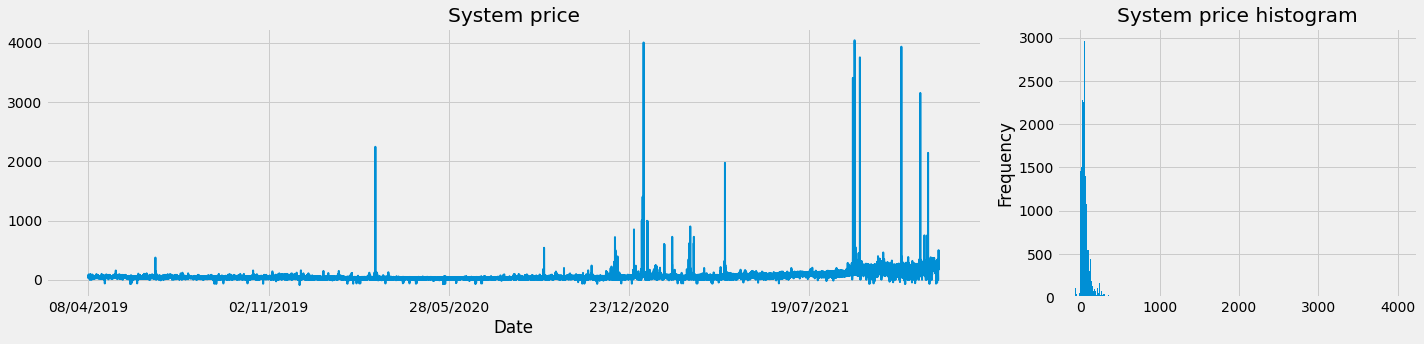

In [480]:

subplots_ratio = dict(width_ratios=[13,5], height_ratios=[1]) 
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(20,5))
all['SystemPrice'].plot(title='System price', ax=ax[0], grid=True, linewidth=2) 
all['SystemPrice'].plot.hist(title='System price histogram', ax=ax[1], grid=True, bins=1000)
# plt.tight_layout()
ylim(2000,0)

plt.savefig('undiff_epex.png')

# Log-returns implementation


In [481]:
all["diff_epex"] = abs(all["EpexHourly"]).apply(np.log).diff(2)
all["diff_spot"] = abs(all["SpotPrice"]).apply(np.log).diff(2)
all["diff_system"] = abs(all["SystemPrice"]).apply(np.log).diff(2)

In [482]:
all['diff_spot'].fillna(0,inplace = True)
all['diff_epex'].fillna(0,inplace = True)
all['diff_system'].fillna(0, inplace = True)
# epex
all.isna().sum()


Period               0
EpexHourly           0
SpotPrice          374
SystemPrice          0
ImbalanceVolume      0
diff_epex            0
diff_spot            0
diff_system          0
dtype: int64

In [483]:
# for i in range(0,len(Log_diff_al)-1):
#   # i += 1
#   huh = Log_diff_al.isna
#   # print(huh.index)
# epex = all['abs_epex'].apply(np.log).diff(2)
# sys = all['abs_system'].apply(np.log).diff(2)
# spot = all['abs_spot'].apply(np.log).diff(2)

#Total Log Return Plot for all 3 markets

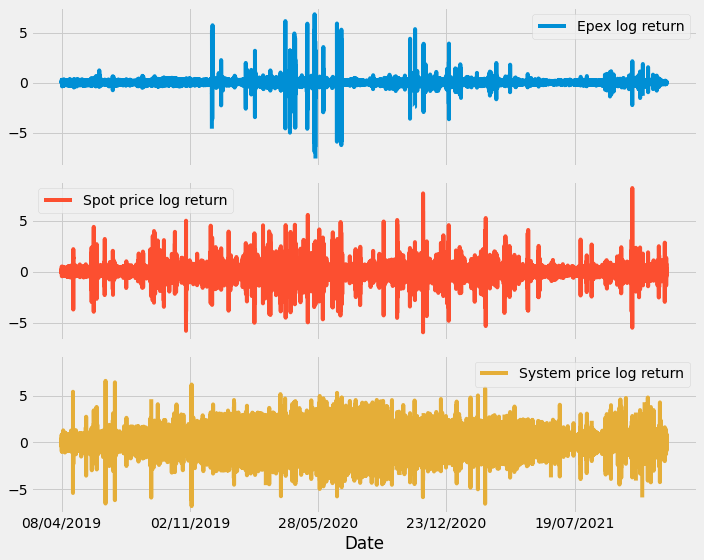

In [484]:
a = all['diff_epex']#.plot(title='Epex', grid=True, linewidth=2)
b = all['diff_spot']#.plot(title='Spot Price ', grid=True, linewidth=2)
c = all['diff_system']#.plot(title='System Price', grid=True, linewidth=2)

# signals = pd.concat([s1, s2, s3, s4], axis=1)
diff_gh = pd.concat([a, b, c],axis=1)
diff_gh.columns = ['Epex log return','Spot price log return','System price log return']
diff_gh.plot(subplots = True, figsize = (10,8))
plt.legend(loc='upper right')
plt.show()

#Histogram after log return implementation


In [547]:
#Eliminat infinity values
all['diff_epex'].replace([np.inf, -np.inf], np.nan, inplace=True)
all['diff_system'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [548]:
all['diff_system'].describe()

count    46548.000000
mean        -0.000217
std          0.831717
min         -6.802395
25%         -0.133531
50%          0.000000
75%          0.140091
max          8.598042
Name: diff_system, dtype: float64

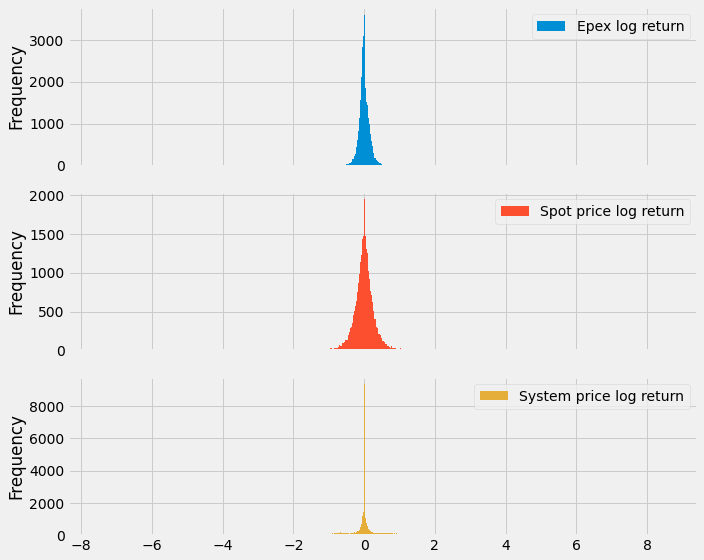

In [551]:
a = all['diff_epex']#.plot(title='Epex', grid=True, linewidth=2)
b = all['diff_spot']#.plot(title='Spot Price ', grid=True, linewidth=2)
c = all['diff_system']#.plot(title='System Price', grid=True, linewidth=2)

diff_gh = pd.concat([a, b, c],axis=1)
diff_gh.columns = ['Epex log return','Spot price log return','System price log return']
diff_gh.plot(kind = 'hist',subplots = True, figsize = (10,8),grid=True, bins=1000)
plt.legend(loc='upper right')

plt.show()

# Moving Stat

Rolling statistic for EPEX price

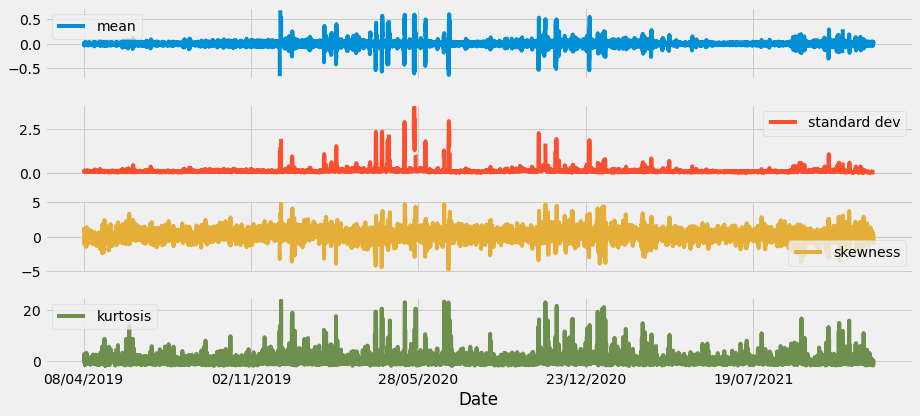

In [488]:
w = 25 #frame
s1 = all['diff_epex'].rolling(w).mean() #moving average
s2 = all['diff_epex'].rolling(w).std()  #moving std
s3 = all['diff_epex'].rolling(w).skew() #moving skewness
s4 = all['diff_epex'].rolling(w).kurt() #moving kurtosis

epx_move = pd.concat([s1, s2, s3, s4], axis=1)
epx_move.columns = ['mean', 'standard dev', 'skewness', 'kurtosis']
epx_move.plot(subplots=True, figsize=(13,6));
# plt.tight_layout()

Rolling statistic for Spot price

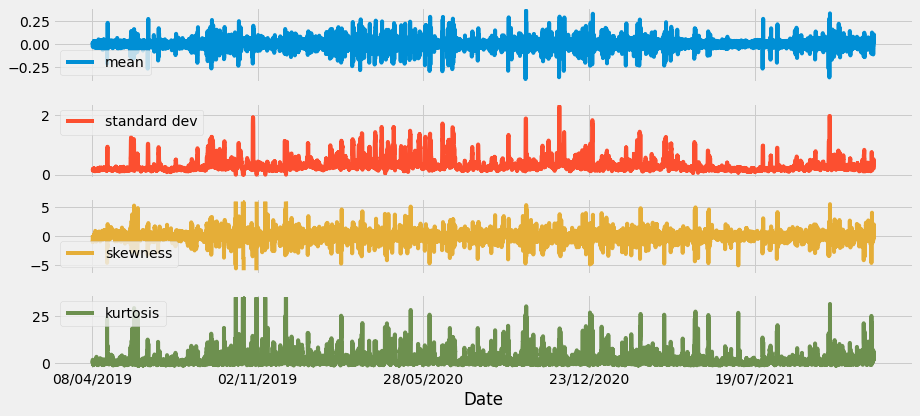

In [496]:
w = 35 #frame
s1 = all['diff_spot'].rolling(w).mean() #moving average
s2 = all['diff_spot'].rolling(w).std()  #moving std
s3 = all['diff_spot'].rolling(w).skew() #moving skewness
s4 = all['diff_spot'].rolling(w).kurt() #moving kurtosis
epx_move = pd.concat([s1, s2, s3, s4], axis=1)
epx_move.columns = ['mean', 'standard dev', 'skewness', 'kurtosis']
epx_move.plot(subplots=True, figsize=(13,6));
# plt.title('Rolling statistic for Spot price')


Rolling statistic for System price

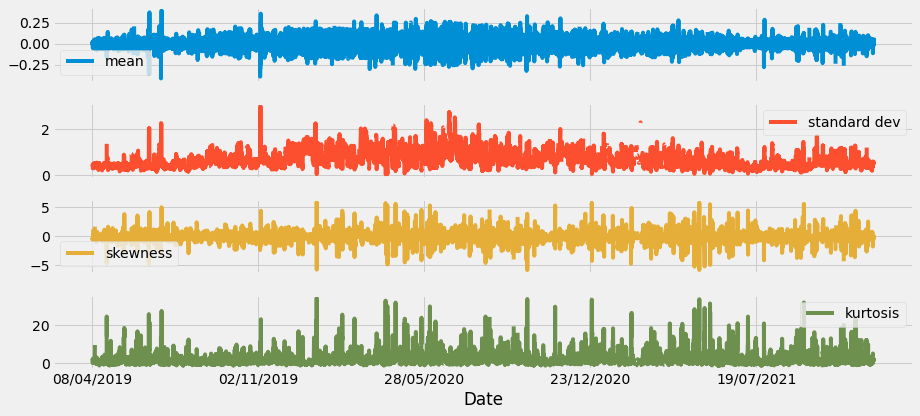

In [490]:
w = 35 #frame
s1 = all['diff_system'].rolling(w).mean() #moving average
s2 = all['diff_system'].rolling(w).std()  #moving std
s3 = all['diff_system'].rolling(w).skew() #moving skewness
s4 = all['diff_system'].rolling(w).kurt() #moving kurtosis
epx_move = pd.concat([s1, s2, s3, s4], axis=1)
epx_move.columns = ['mean', 'standard dev', 'skewness', 'kurtosis']
epx_move.plot(subplots=True, figsize=(13,6));
# plt.title('Rolling statistic for Spot price')


# Volatility visualisation


(-70000.0, 160000.0)

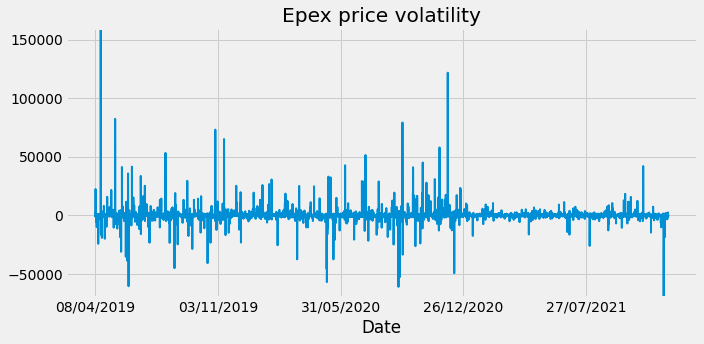

In [598]:

s1 = all['diff_epex']
s2 = all['diff_spot']
s3 = all['diff_system']
percent_change_ep = 100*(s1.pct_change()).dropna()
percent_change_sp = 100*(s2.pct_change()).dropna()
percent_change_ss = 100*(s3.pct_change()).dropna()

percent_change_ep.replace([np.inf,-np.inf],np.nan,inplace=True)
percent_change_sp.replace([np.inf,-np.inf],np.nan,inplace=True)
percent_change_ss.replace([np.inf,-np.inf],np.nan,inplace=True)

percent_change_ep.plot(title='Epex price volatility', grid=True, linewidth=2) 
plt.ylim(-70000,160000)
# plt.show()
# plt.tight_layout()
# plt.savefig('undiff_epex.png')

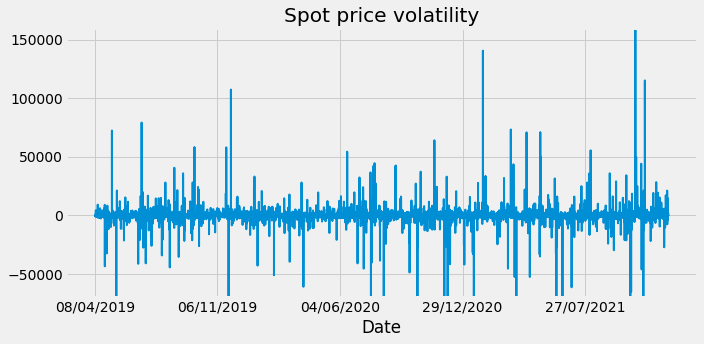

In [600]:
plt.ylim(-70000,160000)
percent_change_sp.plot(title='Spot price volatility', grid=True, linewidth=2) 

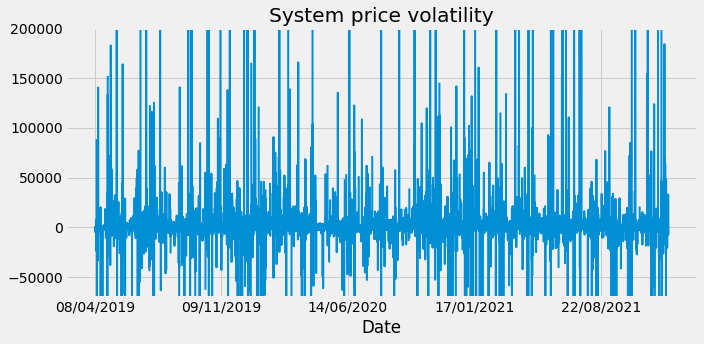

In [597]:
plt.ylim(-70000,200000)
percent_change_ss.plot(title='System price volatility', grid=True, linewidth=2) 

#Atttempt to analyse volatilty between 3 price market

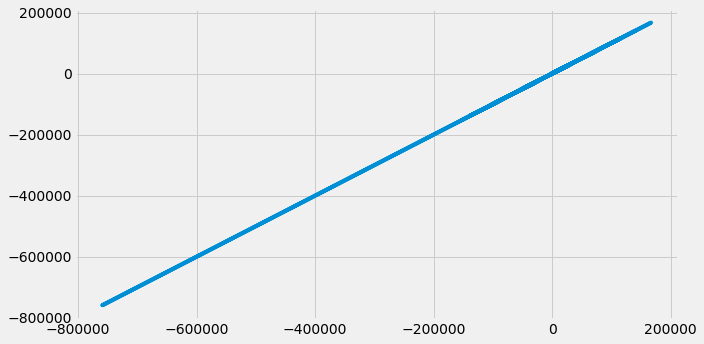

In [623]:

test_limit = all.index.values[1:400]
count=0
for i in test_limit:
  count +=1
  s1 = all['diff_epex']
  s2 = all['diff_spot']
  s3 = all['diff_system']
  percent_change_ep = 100*(s2.pct_change()).dropna()
  percent_change_ep.replace([np.inf,-np.inf],np.nan,inplace=True) 

  percent_change_sp = 100*(s2.pct_change()).dropna()
  percent_change_sp.replace([np.inf,-np.inf],np.nan,inplace=True) 

  percent_change_ss= 100*(s2.pct_change()).dropna()
  percent_change_ss.replace([np.inf,-np.inf],np.nan,inplace=True) 
plt.plot(percent_change_sp,percent_change_ep)